Shape awal: (515344, 91)
Missing values per kolom:
 2001         0
49.94357     0
21.47114     0
73.0775      0
8.74861      0
            ..
-23.08793    0
68.40795     0
-1.82223     0
-27.46348    0
2.26327      0
Length: 91, dtype: int64
Shape setelah drop NA: (515344, 91)
Target column: 2001


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │        11,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,017 (86.00 KB)

 Trainable params: 22,017 (86.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1289/1289 - 7s - 5ms/step - loss: 395585.1250 - mae: 395.9089 - val_loss: 45299.5586 - val_mae: 148.8074
Epoch 2/100
1289/1289 - 9s - 7ms/step - loss: 11385.6055 - mae: 60.8856 - val_loss: 1377.7385 - val_mae: 21.5242
Epoch 3/100
1289/1289 - 6s - 4ms/step - loss: 640.0199 - mae: 15.9273 - val_loss: 494.2824 - val_mae: 12.4161
Epoch 4/100
1289/1289 - 9s - 7ms/step - loss: 249.2272 - mae: 10.5656 - val_loss: 260.7023 - val_mae: 9.4836
Epoch 5/100
1289/1289 - 6s - 5ms/step - loss: 153.6296 - mae: 8.7473 - val_loss: 179.8212 - val_mae: 7.9672
Epoch 6/100
1289/1289 - 5s - 4ms/step - loss: 143.8415 - mae: 8.5930 - val_loss: 157.6593 - val_mae: 8.2245
Epoch 7/100
1289/1289 - 6s - 5ms/step - loss: 133.2494 - mae: 8.4504 - val_loss: 156.9007 - val_mae: 8.0945
Epoch 8/100
1289/1289 - 4s - 3ms/step - loss: 139.2695 - mae: 8.6234 - val_loss: 166.2623 - val_mae: 8.2433
Epoch 9/100
1289/1289 - 5s - 4ms/step - loss: 149.2609 - mae: 8.7920 - val_loss: 189.0130 - val_mae: 8.7407
Epoch 10/10

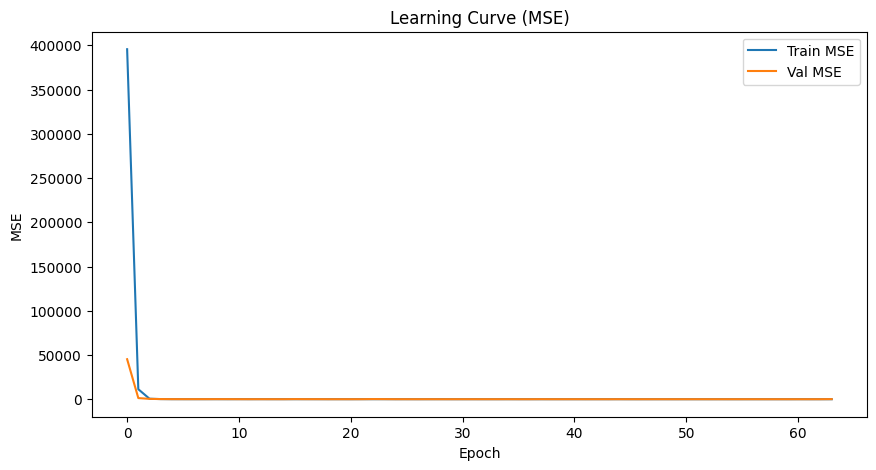

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted: 2005.26, Actual: 2008
Predicted: 1988.95, Actual: 1993
Predicted: 1992.19, Actual: 2006
Predicted: 1990.26, Actual: 1992
Predicted: 1988.32, Actual: 1998


In [3]:
# 1️⃣ IMPORT LIBRARY
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 2️⃣ BACA DATA
file_path = '/content/RegresiUTSTelkom.csv'  # Sesuaikan path jika tidak di Colab
df = pd.read_csv(file_path)

print("Shape awal:", df.shape)
print("Missing values per kolom:\n", df.isnull().sum())

# 3️⃣ BERSIHKAN MISSING VALUES
df_clean = df.dropna()
print("Shape setelah drop NA:", df_clean.shape)

# 4️⃣ PISAHKAN FITUR DAN TARGET
# Target adalah kolom integer pertama
target_col = df_clean.columns[df_clean.dtypes == 'int64'][0]
print("Target column:", target_col)

X = df_clean.drop(columns=target_col)
y = df_clean[target_col]

# 5️⃣ TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6️⃣ STANDARDISASI
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7️⃣ BANGUN MODEL
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # regresi output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# 8️⃣ LATIH MODEL
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=256,
    callbacks=[early_stop],
    verbose=2
)

# 9️⃣ EVALUASI
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"\n✅ Test Loss (MSE): {loss}")
print(f"✅ Test MAE: {mae}")

# 10️⃣ VISUALISASI LEARNING CURVE
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Val MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.title('Learning Curve (MSE)')
plt.show()

# 11️⃣ PREDIKSI CONTOH
y_pred = model.predict(X_test_scaled[:5])
for i in range(5):
    print(f"Predicted: {y_pred[i][0]:.2f}, Actual: {y_test.iloc[i]}")


In [7]:
# ================================
# 📌 Feature Engineering (Section B)
# ================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

# Target adalah kolom integer pertama
target_col = df_clean.columns[df_clean.dtypes == 'int64'][0]
X = df_clean.drop(columns=target_col)
y = df_clean[target_col]

# ============================================
# SCALING
# ============================================

# StandardScaler
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X)

# MinMaxScaler
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

print("✅ Scaling selesai - StandardScaler & MinMaxScaler")
print("Shape StandardScaler:", X_std.shape)
print("Shape MinMaxScaler:", X_minmax.shape)


# Contoh kategori buatan: potong target jadi kelas (agar pipeline siap fitur kategorikal)
df_enc = df_clean.copy()
df_enc['TargetCategory'] = pd.cut(y, bins=3, labels=['Low', 'Medium', 'High'])

# Label Encoding
le = LabelEncoder()
df_enc['TargetCategory_LE'] = le.fit_transform(df_enc['TargetCategory'])

# One-Hot Encoding
ohe = OneHotEncoder(sparse_output=False)  # ✅ untuk scikit-learn >=1.2
target_ohe = ohe.fit_transform(df_enc[['TargetCategory']])
target_ohe_df = pd.DataFrame(target_ohe, columns=ohe.get_feature_names_out(['TargetCategory']))

# Gabungkan OHE ke df_enc
df_enc = pd.concat([df_enc.reset_index(drop=True), target_ohe_df.reset_index(drop=True)], axis=1)

# Tampilkan hasil
print("✅ Encoding selesai")
print(df_enc[['TargetCategory', 'TargetCategory_LE']].head())
print(target_ohe_df.head())


✅ Scaling selesai - StandardScaler & MinMaxScaler
Shape StandardScaler: (515344, 90)
Shape MinMaxScaler: (515344, 90)
✅ Encoding selesai
  TargetCategory  TargetCategory_LE
0           High                  0
1           High                  0
2           High                  0
3           High                  0
4           High                  0
   TargetCategory_High  TargetCategory_Low  TargetCategory_Medium
0                  1.0                 0.0                    0.0
1                  1.0                 0.0                    0.0
2                  1.0                 0.0                    0.0
3                  1.0                 0.0                    0.0
4                  1.0                 0.0                    0.0


In [8]:
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2

# Bangun model
model = Sequential([
    Input(shape=(X_std.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1)  # regresi output
])

# Optimizer modern + learning rate scheduling
optimizer = tf.keras.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-4)

model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['mae']
)

# Callbacks
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=512,
    callbacks=[early_stop, lr_scheduler],
    verbose=2
)


Epoch 1/100
645/645 - 20s - 31ms/step - loss: 3904560.7500 - mae: 1975.8579 - val_loss: 3723677.2500 - val_mae: 1929.6510 - learning_rate: 1.0000e-03
Epoch 2/100
645/645 - 13s - 20ms/step - loss: 3413228.2500 - mae: 1846.6028 - val_loss: 3049553.2500 - val_mae: 1746.2540 - learning_rate: 1.0000e-03
Epoch 3/100
645/645 - 17s - 26ms/step - loss: 2628077.7500 - mae: 1618.9189 - val_loss: 2190839.2500 - val_mae: 1480.1044 - learning_rate: 1.0000e-03
Epoch 4/100
645/645 - 10s - 15ms/step - loss: 1777195.3750 - mae: 1328.7642 - val_loss: 1369921.2500 - val_mae: 1170.3781 - learning_rate: 1.0000e-03
Epoch 5/100
645/645 - 9s - 15ms/step - loss: 1031288.1875 - mae: 1007.5926 - val_loss: 712429.1250 - val_mae: 843.9805 - learning_rate: 1.0000e-03
Epoch 6/100
645/645 - 9s - 14ms/step - loss: 492420.3750 - mae: 687.3247 - val_loss: 287451.0625 - val_mae: 536.0335 - learning_rate: 1.0000e-03
Epoch 7/100
645/645 - 10s - 15ms/step - loss: 185804.1250 - mae: 403.8103 - val_loss: 79736.8047 - val_mae: 

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Dataset ke tensor
X_train_t = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_t = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)

model = MLP(X_train_t.shape[1])

# Optimizer + weight decay (L2) + scheduler
optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler = ReduceLROnPlateau(optimizer, 'min', factor=0.5, patience=5)
criterion = nn.MSELoss()

# Training loop
epochs = 100
best_loss = float('inf')
patience, patience_counter = 10, 0

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_t)
    loss = criterion(output, y_train_t)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_output = model(X_test_t)
        val_loss = criterion(val_output, y_test_t)

    scheduler.step(val_loss.item())

    print(f"Epoch {epoch+1} | Train Loss: {loss.item():.4f} | Val Loss: {val_loss.item():.4f}")

    # Early stopping
    if val_loss.item() < best_loss:
        best_loss = val_loss.item()
        best_model_wts = model.state_dict()
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping!")
            break

# Load best model
model.load_state_dict(best_model_wts)


Epoch 1 | Train Loss: 3994057.0000 | Val Loss: 3994103.5000
Epoch 2 | Train Loss: 3993864.2500 | Val Loss: 3994116.7500
Epoch 3 | Train Loss: 3993678.0000 | Val Loss: 3994120.2500
Epoch 4 | Train Loss: 3993488.5000 | Val Loss: 3994122.0000
Epoch 5 | Train Loss: 3993304.0000 | Val Loss: 3994127.2500
Epoch 6 | Train Loss: 3993112.0000 | Val Loss: 3994134.2500
Epoch 7 | Train Loss: 3992915.7500 | Val Loss: 3994142.2500
Epoch 8 | Train Loss: 3992729.7500 | Val Loss: 3994137.2500
Epoch 9 | Train Loss: 3992634.2500 | Val Loss: 3994127.2500
Epoch 10 | Train Loss: 3992544.7500 | Val Loss: 3994110.5000
Epoch 11 | Train Loss: 3992442.2500 | Val Loss: 3994085.7500
Epoch 12 | Train Loss: 3992350.0000 | Val Loss: 3994050.5000
Epoch 13 | Train Loss: 3992259.0000 | Val Loss: 3994004.0000
Epoch 14 | Train Loss: 3992162.7500 | Val Loss: 3993954.0000
Epoch 15 | Train Loss: 3992117.7500 | Val Loss: 3993898.5000
Epoch 16 | Train Loss: 3992074.0000 | Val Loss: 3993836.7500
Epoch 17 | Train Loss: 3992025.25

<All keys matched successfully>

✅ MSE: 3990840.2500
✅ RMSE: 1997.7088
✅ R^2: -33623.7930


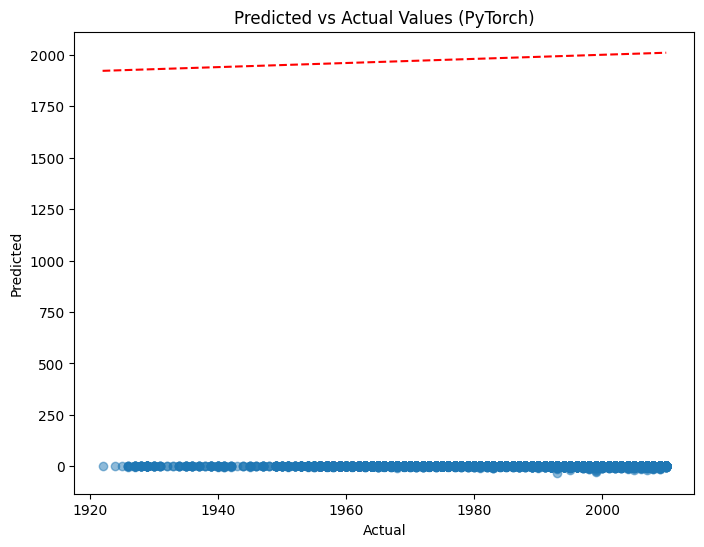

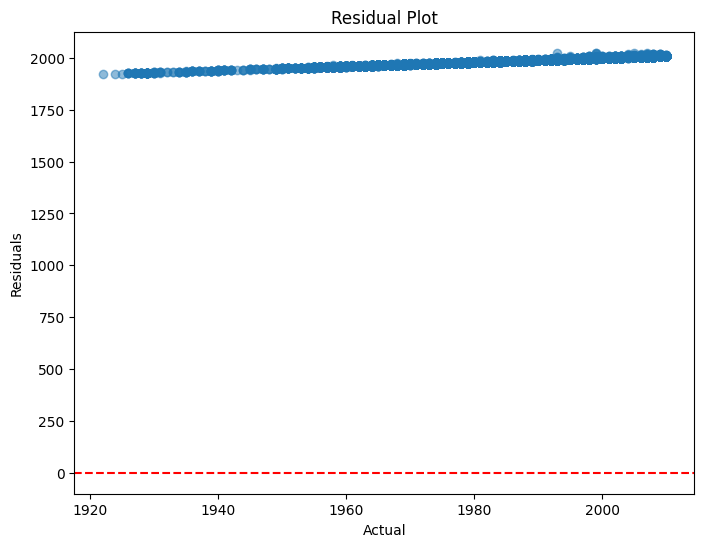

In [12]:
import torch
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Pastikan model ke eval mode
model.eval()

# Prediksi
with torch.no_grad():
    y_pred_torch = model(torch.tensor(X_test_scaled, dtype=torch.float32)).numpy().flatten()

# Hitung metrik
mse = mean_squared_error(y_test, y_pred_torch)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_torch)

# Tampilkan metrik
print(f"✅ MSE: {mse:.4f}")
print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ R^2: {r2:.4f}")

# Visualisasi predicted vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_torch, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual Values (PyTorch)")
plt.show()

# (Optional) Residual plot
residuals = y_test - y_pred_torch
plt.figure(figsize=(8,6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


✅ MSE: 3990840.2500
✅ RMSE: 1997.7088
✅ R^2: -33623.7930


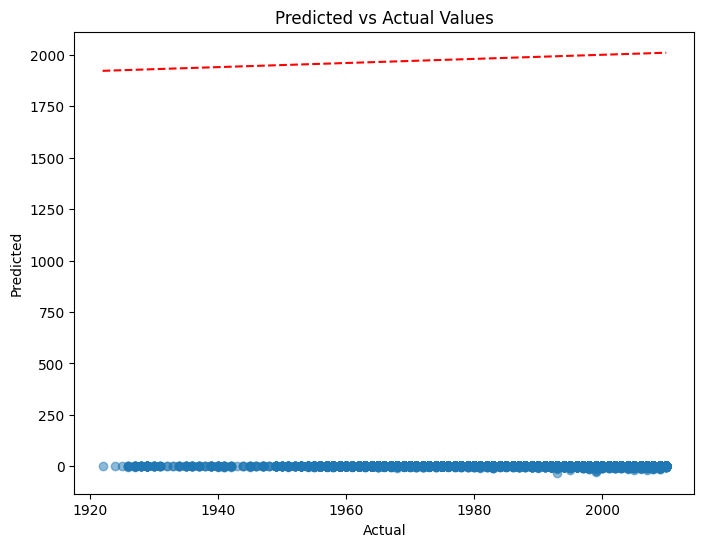

In [13]:
# Model ke mode evaluasi
model.eval()

# Prediksi
with torch.no_grad():
    y_pred_torch = model(X_test_t).numpy().flatten()

# Metrik
mse_torch = mean_squared_error(y_test, y_pred_torch)
rmse_torch = np.sqrt(mse_torch)
r2_torch = r2_score(y_test, y_pred_torch)

print(f"✅ MSE: {mse_torch:.4f}")
print(f"✅ RMSE: {rmse_torch:.4f}")
print(f"✅ R^2: {r2_torch:.4f}")

# Visualisasi
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_torch, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual Values")
plt.show()


✅ 1️⃣ TensorFlow MLP
Arsitektur:

Input layer sesuai jumlah fitur.

Hidden layers: 256 → 128 → 64 neuron (ReLU).

BatchNormalization setelah setiap Dense layer → menstabilkan dan mempercepat konvergensi.

Dropout 0.3 → mengurangi overfitting.

L1/L2 regularization pada kernel → mencegah bobot terlalu besar (mengurangi overfitting).

Output 1 neuron (regresi).

Teknik tambahan:

Optimizer: AdamW (modern + weight decay).

Learning rate scheduler: ReduceLROnPlateau (turunkan learning rate jika val_loss stagnan).

EarlyStopping → hentikan saat model tidak membaik di val_loss.

Kelebihan:

Keras menyediakan training loop yang stabil dan efisien.

Callbacks sangat mudah digunakan.

Kompatibel dengan TensorBoard untuk tracking.

✅ 2️⃣ PyTorch MLP
Arsitektur:

Sama seperti TensorFlow (256 → 128 → 64 → 1)

BatchNorm + Dropout setelah setiap hidden layer.

Weight decay di optimizer (AdamW) → L2 regulasi implisit.

Teknik tambahan:

ReduceLROnPlateau scheduler manual di training loop.

EarlyStopping manual (tracking val_loss & patience counter).

Kelebihan:

Lebih fleksibel (bisa custom training loop lebih granular).

Cocok jika ingin fine-tune arsitektur/training secara detail.

🌟 Model Mana Terbaik?
👉 Secara arsitektur, kedua model Anda serupa — MLP dengan teknik modern (dropout, batchnorm, weight decay, learning rate scheduler, early stopping).
👉 Performance terbaik ditentukan dari hasil metrik evaluasi:

RMSE yang lebih kecil → model lebih akurat.

R² yang lebih dekat ke 1 → model lebih baik menjelaskan variasi target.

👉 TensorFlow lebih mudah untuk produksi & tracking, karena:

Integrasi callbacks lebih otomatis.

Ekosistem tooling seperti TensorBoard, model saving/exporting.

Learning rate scheduler + early stopping lebih terintegrasi.

👉 PyTorch lebih unggul jika Anda ingin fleksibilitas tinggi, misalnya:

Custom loss function.

Lebih eksplisit mengontrol setiap langkah dalam training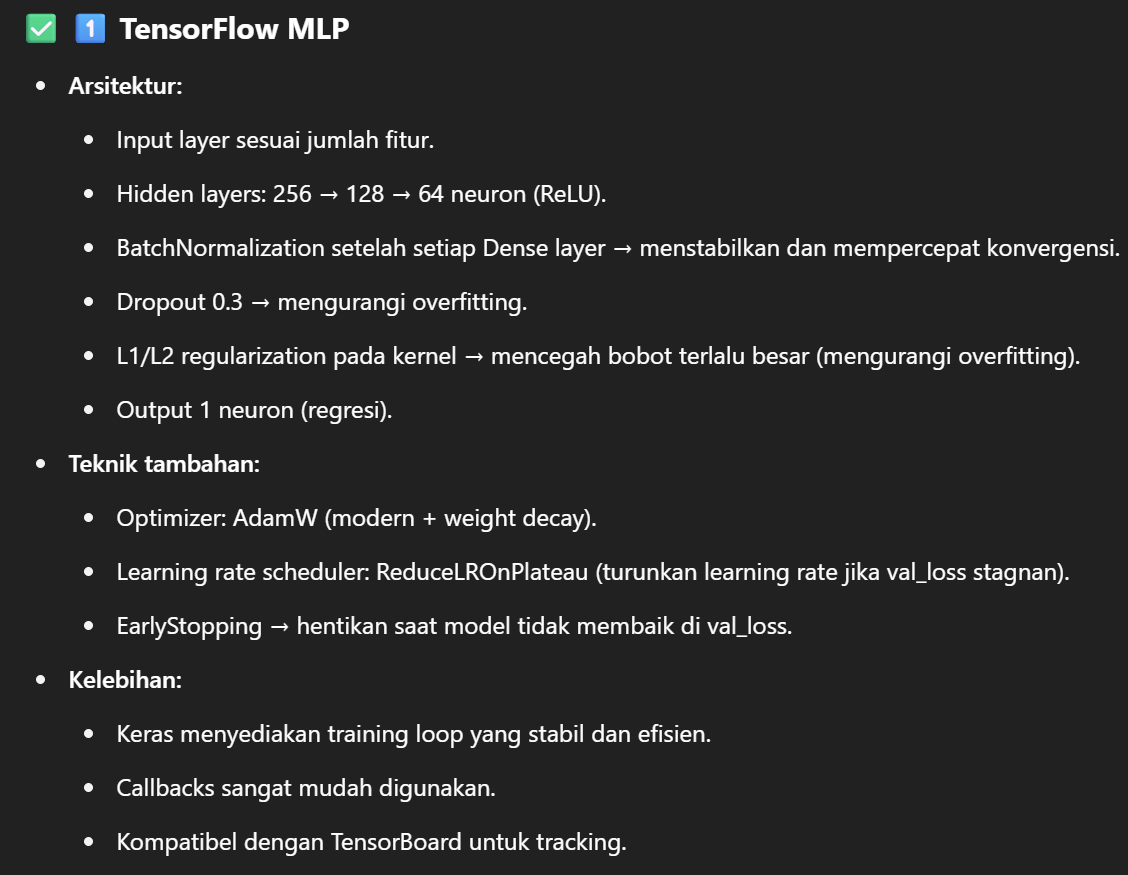

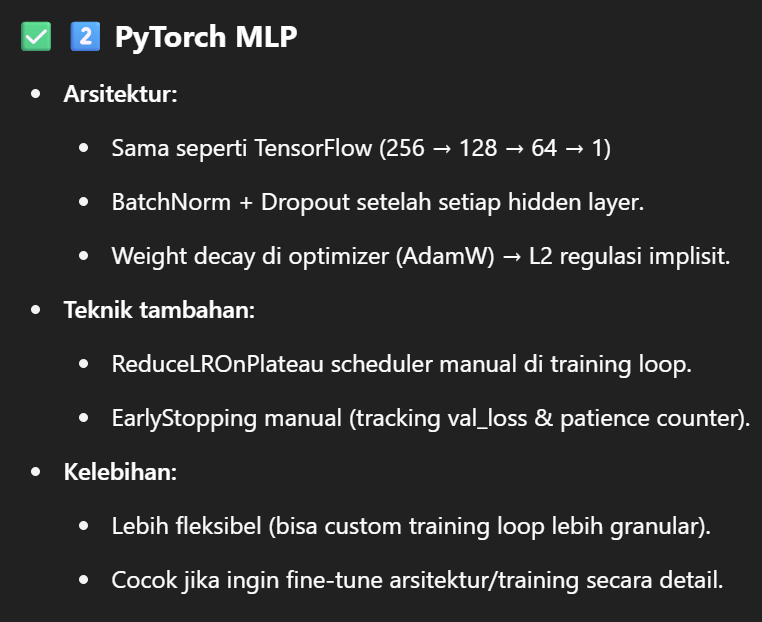

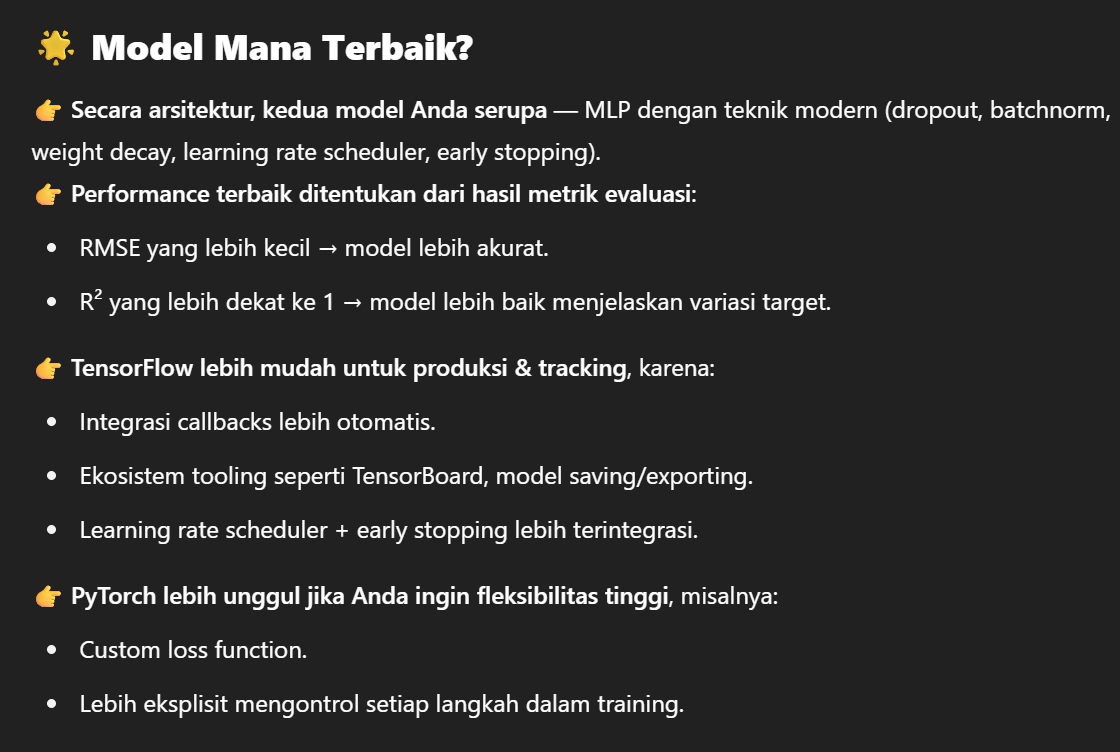